# << 리뷰데이터를 긍정,부정을 나누어 워드클라우드 생성 >>
감성분석에서 만들었던 평점,리뷰 데이터로 긍정,부정을 나누어 워드 클라우드를 생성
긍정적인 리뷰에 많이 노출되는 단어를 추출하여 영화에서 어떤 부분이 좋았는지를 추측할 수 있다.
반대로 부정적인 댓글에서는 어느 점이 싫었는지를 알 수 있어, 개선에 도움을 받을 수 있다.

### 전체 과정
- step1. 데이터를 가져와서 스코어를 기준으로 긍정,부정 리뷰를 나눔
- step2. 나누어진 리뷰데이터를 형태서 분석하여 명사를 토큰화한다.
- step3. 토큰화 된 명사중에서 자주 나오는 50개의 단어를 확인
- step4. 해당 단어의 빈도수를 표현하는 차트 생성
- step5. 자주 나오는 500개의 단어로 워드 클라우드 생성

### step0. import

In [54]:
import nltk
import numpy as np
from konlpy.tag import Okt; t = Okt()
import pandas as pd
import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

### step1. 데이터를 가져와서 스코어를 기준으로 긍정,부정 리뷰를 나눔

In [60]:
df=pd.read_csv('star_score.csv')

In [61]:
len(df)

73612

In [62]:
df1=df[df.score<6] #0~4점은 부정
df2=df[df.score>5] #8~10점은 긍정

In [63]:
df1=df1['text'] # 그 중에서 긍정 리뷰만 추출
df2=df2['text'] # 부정 리뷰 추출

In [64]:
len(df1)

20063

In [65]:
len(df2)

53549

### step2. 나누어진 리뷰데이터를 형태소 분석하여 명사를 토큰화한다.

In [66]:
pos= ''

for each_line in df2[:3000]:
    pos = pos + each_line + '\n'

In [67]:
tokens_pos = t.nouns(pos) #형태소 분석 Okt
tokens_pos[0:10]

['올라프', '편', '요약', '기', '맥힙', '크리스토퍼', '뮤비', '좀', '흠칫', '함']

In [68]:
neg = ''

for each_line in df1[:2000]:
    neg = neg + each_line + '\n'

In [69]:
tokens_neg = t.nouns(neg)
tokens_neg[0:10]

['관람객', '화가', '대작', '화', '스토리', '재미', '노래', '개', '걸', '의문']

In [70]:
po = nltk.Text(tokens_pos, name='영화')
print(len(po.tokens))
print(len(set(po.tokens)))

22474
2979


In [71]:
ne = nltk.Text(tokens_neg, name='영화')
print(len(ne.tokens))
print(len(set(ne.tokens)))

17052
3161


### step3. 토큰화 된 명사중에서 자주 나오는 50개의 단어를 확인

In [72]:
pos_data=po.vocab().most_common(50)
pos_data

[('관람객', 763),
 ('편', 598),
 ('엘사', 589),
 ('스토리', 500),
 ('영화', 469),
 ('노래', 418),
 ('더', 412),
 ('겨울왕국', 378),
 ('진짜', 274),
 ('감동', 259),
 ('상미', 255),
 ('영상', 242),
 ('디즈니', 205),
 ('아이', 194),
 ('올라프', 180),
 ('정말', 178),
 ('때', 170),
 ('것', 164),
 ('역시', 162),
 ('안나', 159),
 ('편이', 156),
 ('보고', 154),
 ('최고', 153),
 ('도', 146),
 ('느낌', 137),
 ('생각', 136),
 ('또', 130),
 ('감상', 116),
 ('좀', 114),
 ('평', 113),
 ('번', 107),
 ('저', 107),
 ('개인', 103),
 ('이번', 99),
 ('꼭', 98),
 ('보기', 98),
 ('볼', 95),
 ('중간', 94),
 ('이', 90),
 ('기대', 90),
 ('어른', 86),
 ('음악', 86),
 ('전편', 84),
 ('장면', 81),
 ('내용', 79),
 ('애', 79),
 ('그냥', 78),
 ('한번', 77),
 ('말', 77),
 ('연출', 75)]

In [73]:
neg_data=ne.vocab().most_common(50)
neg_data

[('영화', 535),
 ('스토리', 503),
 ('노래', 439),
 ('편', 368),
 ('별로', 173),
 ('진짜', 157),
 ('그냥', 149),
 ('노잼', 142),
 ('겨울왕국', 142),
 ('엘사', 138),
 ('재미', 134),
 ('내용', 128),
 ('상미', 124),
 ('개연', 119),
 ('느낌', 101),
 ('돈', 99),
 ('디즈니', 97),
 ('좀', 97),
 ('이', 95),
 ('정말', 94),
 ('평점', 94),
 ('영상', 92),
 ('애', 92),
 ('관람객', 91),
 ('기대', 88),
 ('아이', 87),
 ('점', 87),
 ('중간', 86),
 ('실망', 86),
 ('하나', 85),
 ('생각', 84),
 ('감동', 83),
 ('더', 79),
 ('왜', 79),
 ('것', 74),
 ('보고', 72),
 ('도', 71),
 ('연출', 69),
 ('때', 68),
 ('정도', 67),
 ('개', 64),
 ('전개', 63),
 ('조진웅', 63),
 ('말', 61),
 ('내', 60),
 ('사람', 59),
 ('캐릭터', 59),
 ('시간', 59),
 ('거', 57),
 ('임', 57)]

### step4. 해당 단어의 빈도수를 표현하는 차트 생성

In [74]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import platform
import matplotlib.pyplot as plt

In [75]:
po.similar('영화') #nltk 안에 있는 주어진 단어와 비슷한 환경에서 쓰인 단어를 추출

관람객 편 겨울왕국 엘사 또 정말 올라프 스토리 상미 진짜 역시 감동 안나 사랑 보고 더 생각 디즈니 애니 노래


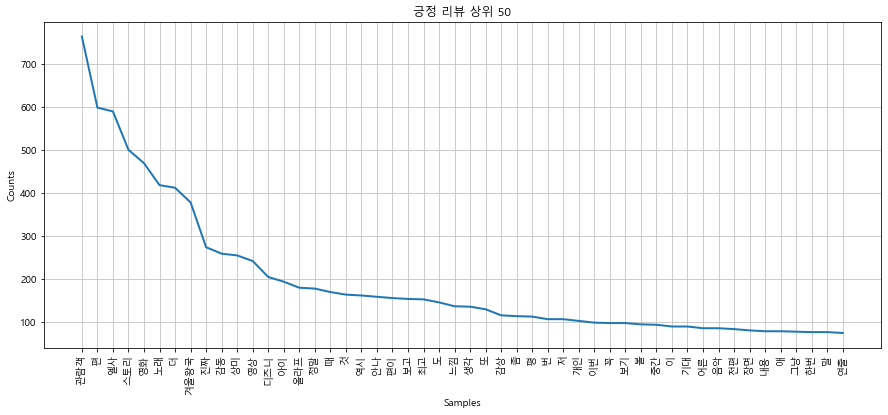

In [83]:
plt.figure(figsize=(15,6))
plt.title('긍정 리뷰 상위 50')
po.plot(50)
plt.show() #긍정 리뷰에서 많이 나오는 단어

In [77]:
ne.similar('영화')

스토리 왜 재미 진짜 편 억지 이제 별로 좀 내용 돈 노래 의문 임 이해 것 정말 마음 디즈니 그닥


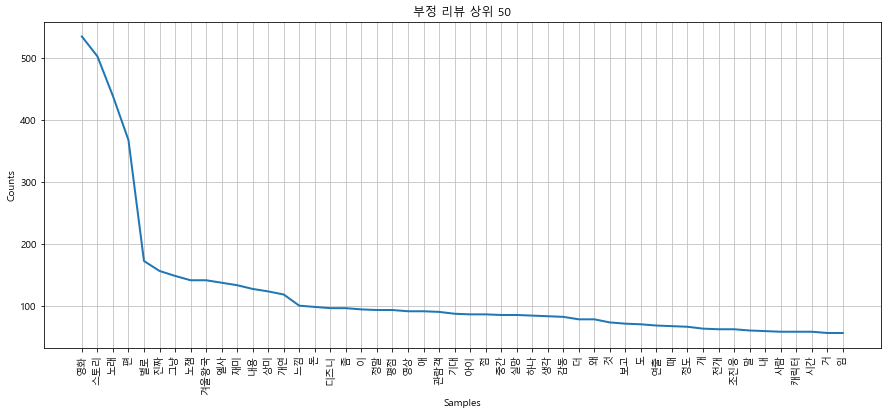

In [84]:
plt.figure(figsize=(15,6))
plt.title('부정 리뷰 상위 50')
ne.plot(50)
plt.show() #부정 리뷰에서 많이 나오는 단어

### step5. 자주 나오는 500개의 단어로 워드 클라우드 생성

In [85]:
mask = np.array(Image.open('popcorn.png'))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

image_colors

In [86]:
pos_data = po.vocab().most_common(500)
# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/jalnan.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(pos_data))

default_colors = wordcloud.to_array()

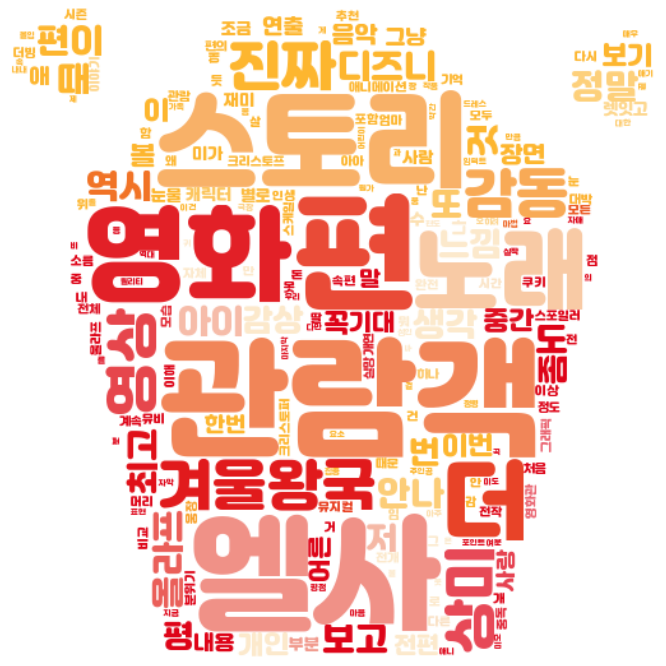

In [87]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show() #긍정 워드클라우드

In [88]:
neg_data = ne.vocab().most_common(500)
# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/jalnan.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'black',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(neg_data))

default_colors = wordcloud.to_array()

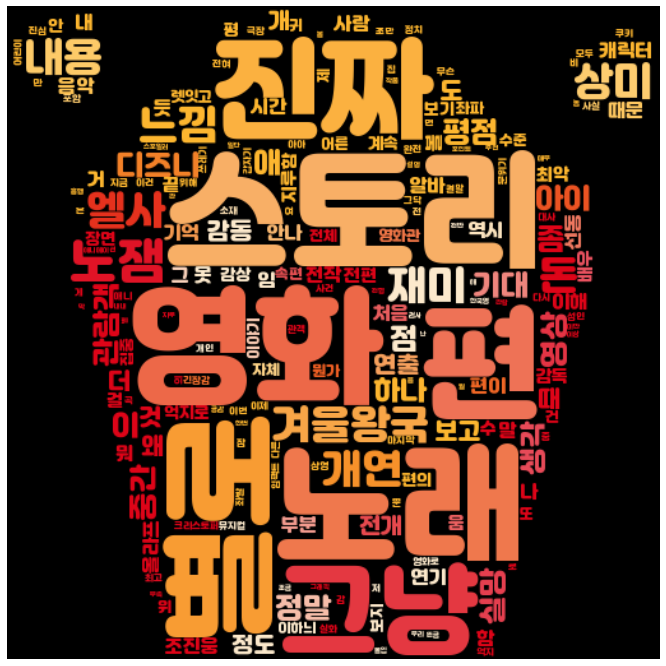

In [89]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show() #부정 워드클라우드